In [1]:
import numpy as np, os, argparse, sys
from pathlib import Path
from utils import params, makeDataLoader, plot_training, plot_lr
import torch, random

from model import train_model


torch.manual_seed(0)
random.seed(0)
np.random.seed(0)

def load_data():

    data_train = {'label': np.load('data/y_train.npy')-1, 'imgs': np.load('data/x_train.npy')}
    data_test = {'label': np.load('data/y_test.npy')-1, 'imgs': np.load('data/x_test.npy')}

    print('Train data shape: ', data_train['imgs'].shape)
    return data_train, data_test

ep = params.ep
bs = params.bs
upper_lr = params.upper_lr
lower_lr = params.lower_lr
plane_lr = params.plane_lr

output = params.output

if not Path('data/x_train.npy').exists():
    os.system('wget -q https://www.dropbox.com/s/sakfqp6o8pbgasm/data.tgz')
    os.system('tar xvzf data.tgz; rm *.tgz; rm ._*; mkdir data; mv *.npy data')
    
data_train, data_test = load_data()

trainloader, devloader = makeDataLoader(crop_size=250, data_train=data_train, data_test=data_test, batch_size=bs)

if not Path(output).exists():
    os.mkdir(output)

Train data shape:  (791, 250, 250, 3)


Change on epoch 25


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


Total number of parameters:  27925396


Epoch:   0: : 25it [00:28,  1.13s/it, loss:2.982 f1:0.062 error:0.880 dev_loss: 2.993 f1_dev:0.005 dev_error:0.948]
Epoch:   1: : 25it [00:21,  1.17it/s, loss:2.897 f1:0.302 error:0.632 dev_loss: 2.982 f1_dev:0.034 dev_error:0.920]
Epoch:   2: : 25it [00:20,  1.22it/s, loss:2.752 f1:0.391 error:0.531 dev_loss: 2.811 f1_dev:0.176 dev_error:0.763]
Epoch:   3: : 25it [00:20,  1.23it/s, loss:2.543 f1:0.435 error:0.499 dev_loss: 2.448 f1_dev:0.303 dev_error:0.624]
Epoch:   4: : 25it [00:20,  1.22it/s, loss:2.285 f1:0.472 error:0.466 dev_loss: 2.104 f1_dev:0.378 dev_error:0.559]
Epoch:   5: : 25it [00:20,  1.21it/s, loss:2.020 f1:0.556 error:0.391 dev_loss: 1.839 f1_dev:0.468 dev_error:0.478]
Epoch:   6: : 25it [00:20,  1.21it/s, loss:1.788 f1:0.601 error:0.341 dev_loss: 1.638 f1_dev:0.515 dev_error:0.436]
Epoch:   7: : 25it [00:20,  1.21it/s, loss:1.567 f1:0.671 error:0.277 dev_loss: 1.450 f1_dev:0.590 dev_error:0.364]
Epoch:   8: : 25it [00:20,  1.21it/s, loss:1.376 f1:0.722 error:0.235 de

Freezing DenseNet


Epoch:  25: : 25it [00:10,  2.34it/s, loss:0.115 f1:0.995 error:0.005 dev_loss: 0.672 f1_dev:0.796 dev_error:0.205]


Space Shift : 0.000


Epoch:  26: : 25it [00:10,  2.34it/s, loss:0.115 f1:0.993 error:0.006 dev_loss: 0.684 f1_dev:0.803 dev_error:0.198]
Epoch:  27: : 25it [00:10,  2.37it/s, loss:0.121 f1:0.995 error:0.005 dev_loss: 0.673 f1_dev:0.806 dev_error:0.196]
Epoch:  28: : 25it [00:10,  2.36it/s, loss:0.110 f1:0.992 error:0.008 dev_loss: 0.683 f1_dev:0.799 dev_error:0.202]
Epoch:  29: : 25it [00:10,  2.40it/s, loss:0.098 f1:0.997 error:0.003 dev_loss: 0.671 f1_dev:0.801 dev_error:0.202]
Epoch:  30: : 25it [00:10,  2.32it/s, loss:0.095 f1:0.997 error:0.003 dev_loss: 0.674 f1_dev:0.802 dev_error:0.199]
Epoch:  31: : 25it [00:10,  2.34it/s, loss:0.089 f1:0.995 error:0.005 dev_loss: 0.674 f1_dev:0.802 dev_error:0.199]
Epoch:  32: : 25it [00:10,  2.34it/s, loss:0.085 f1:0.995 error:0.005 dev_loss: 0.686 f1_dev:0.802 dev_error:0.199]
Epoch:  33: : 25it [00:10,  2.34it/s, loss:0.083 f1:0.995 error:0.005 dev_loss: 0.692 f1_dev:0.798 dev_error:0.204]
Epoch:  34: : 25it [00:10,  2.36it/s, loss:0.075 f1:0.995 error:0.005 de

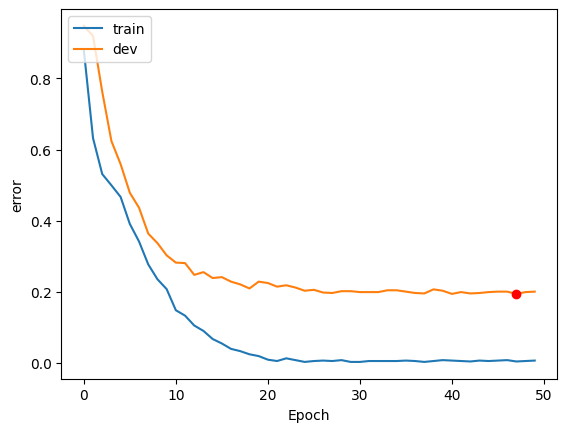

In [2]:
history, model, lr_history = train_model(trainloader, devloader, epoches = ep, batch_size = bs, 
                                lower_lr= lower_lr, upper_lr=upper_lr, output=os.path.join(output, 'best_model'), freeze_at=25)
plot_training(history, output)

In [3]:
index = np.argmin(history['dev_error'])
print(f'Model Checkpoint saved at epoch {index} with accuracy {1 - history["dev_error"][index]:.3f}')

Model Checkpoint saved at epoch 40 with accuracy 0.806


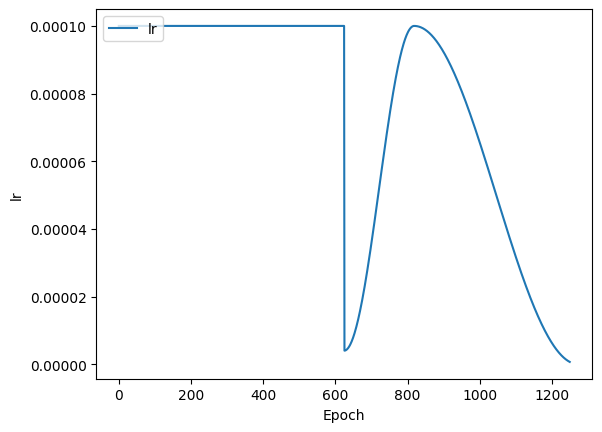

In [4]:
plot_lr(lr_history, output)